# Untersuchung der Vorhersagegenauigkeit der Modelle ohne Stacking

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plotlib
%matplotlib inline
import sklearn
import re

from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC,PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score;
from sklearn.metrics import make_scorer;
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import make_friedman1, make_friedman3
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler  

In [2]:
plt.style.use('ggplot')

plt.rcParams.update({'savefig.dpi': 75})
plt.rcParams.update({'figure.autolayout': False})
plt.rcParams.update({'axes.labelsize': 18})
plt.rcParams.update({'axes.titlesize': 30})
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'lines.linewidth': 2.0})
plt.rcParams.update({'lines.markersize': 8})
plt.rcParams.update({'legend.fontsize': 14})
plt.rcParams.update({'text.usetex': True})

plt.rcParams['font.serif'] = "cm"
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


In [3]:
RANDOM_STATE=20132
np.random.seed(RANDOM_STATE)

In [4]:
%run models/stacking_model.ipynb

In [5]:
%run functions/functions.ipynb

In [6]:
%run visualisation/visualisation_functions.ipynb

In [7]:
def score_rmse(y, y_pred, **kwargs):
    return np.sqrt(mean_squared_error(y, y_pred))

neg_rmse_score = make_scorer(score_rmse,greater_is_better=False)

scores = {"r2":'r2', "neg-rmse": neg_rmse_score}

Erstellen der regressions Modelle

(Model_instance, Model_Name)


In [8]:
regressors = [(LinearRegression(),"Linear Regression"),
              (Lasso(), "Lasso"),
              (RandomForestRegressor(n_estimators=10),"Random Forrest"),
              (KNeighborsRegressor(n_neighbors=5), "K Neighbors Regression"),
             ]
len(regressors)

4

# Testen der Vorhersagegenauigkeit der Modelle ohne Stacking

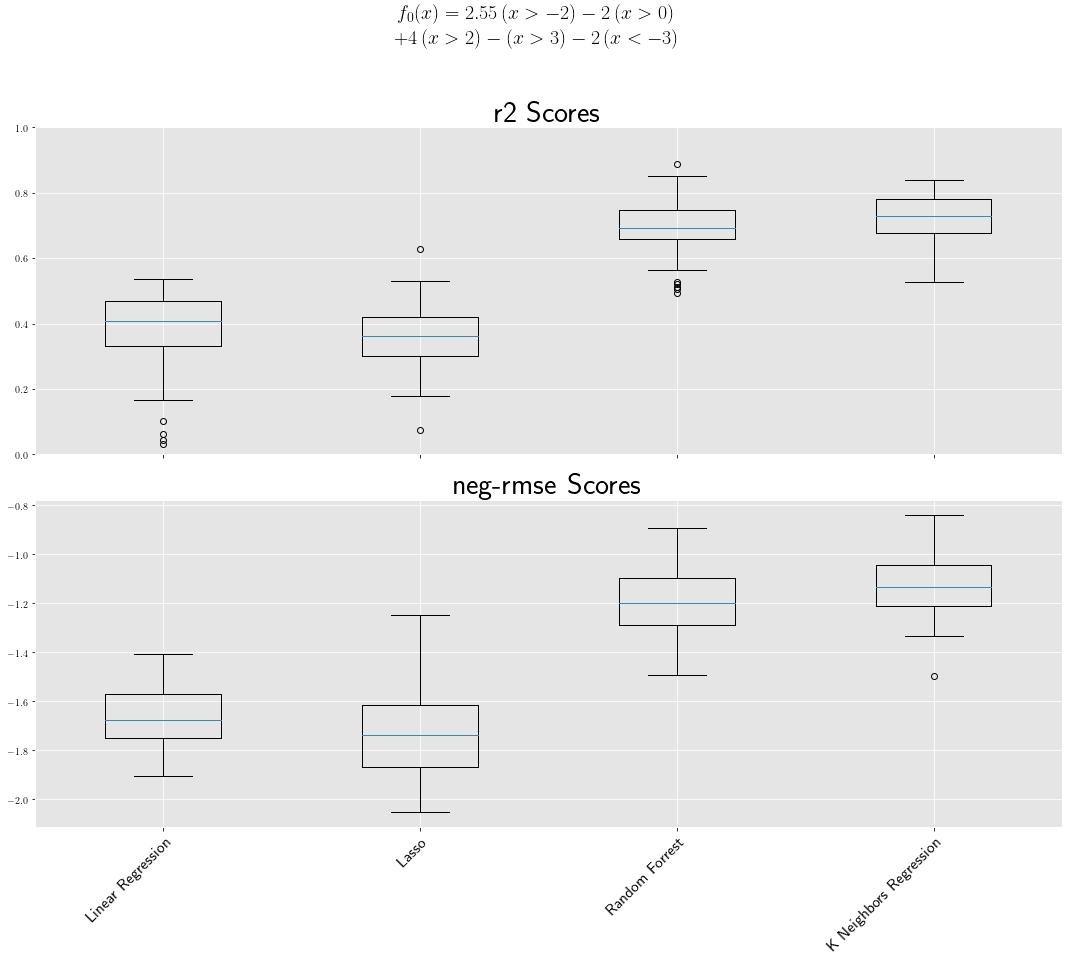

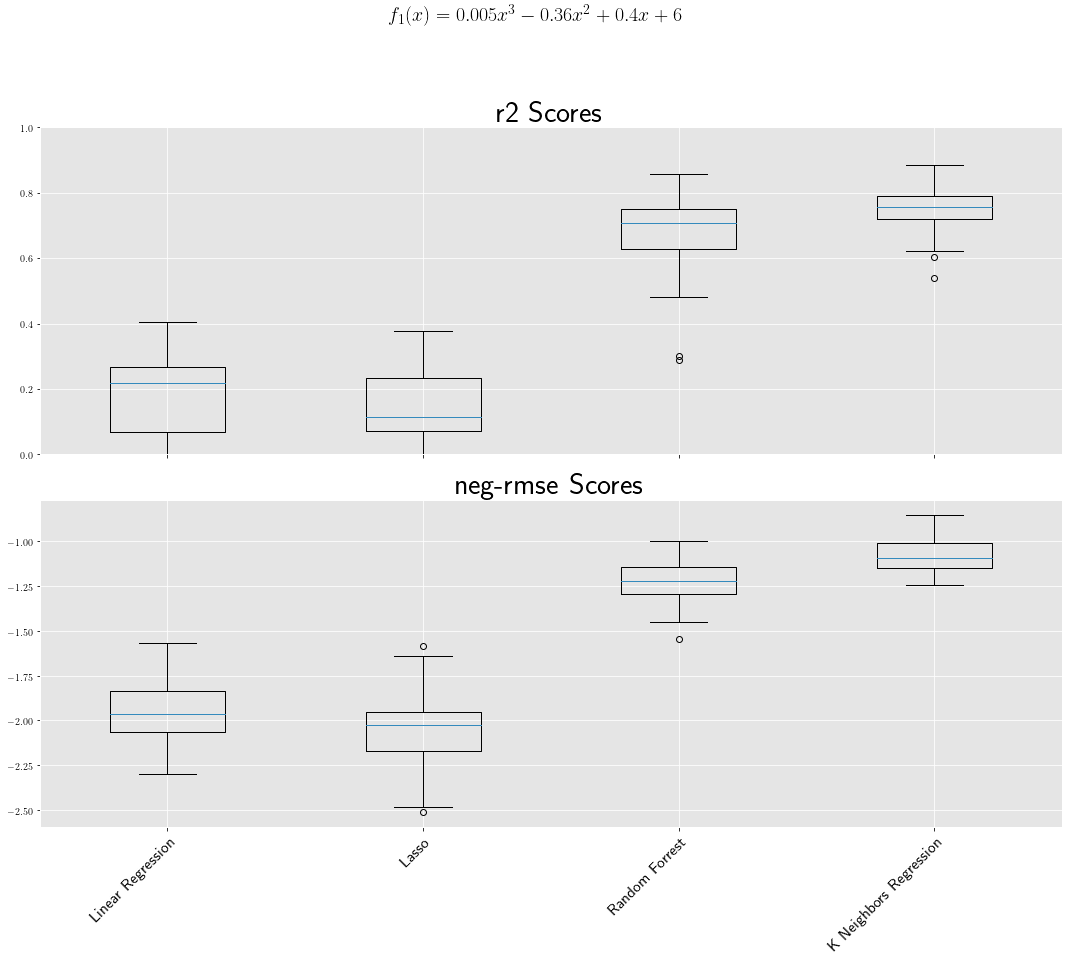

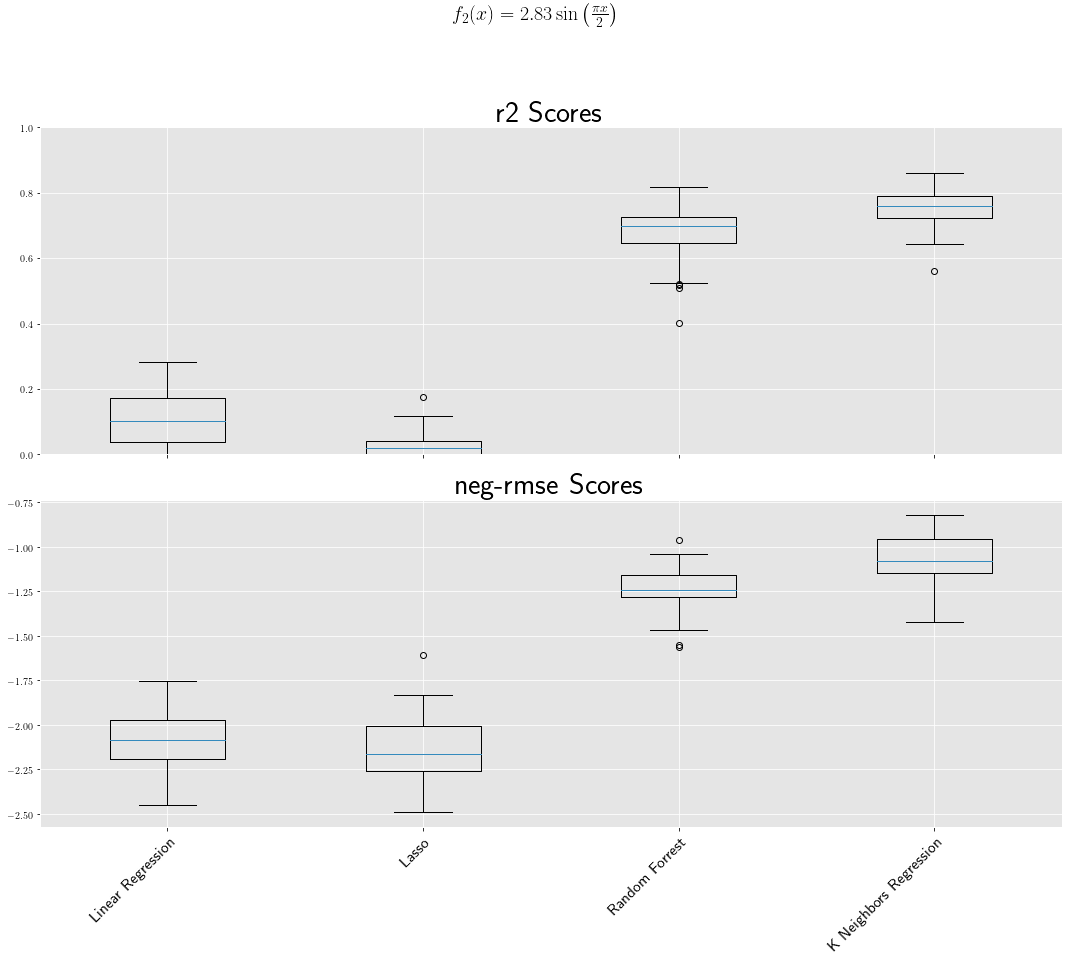

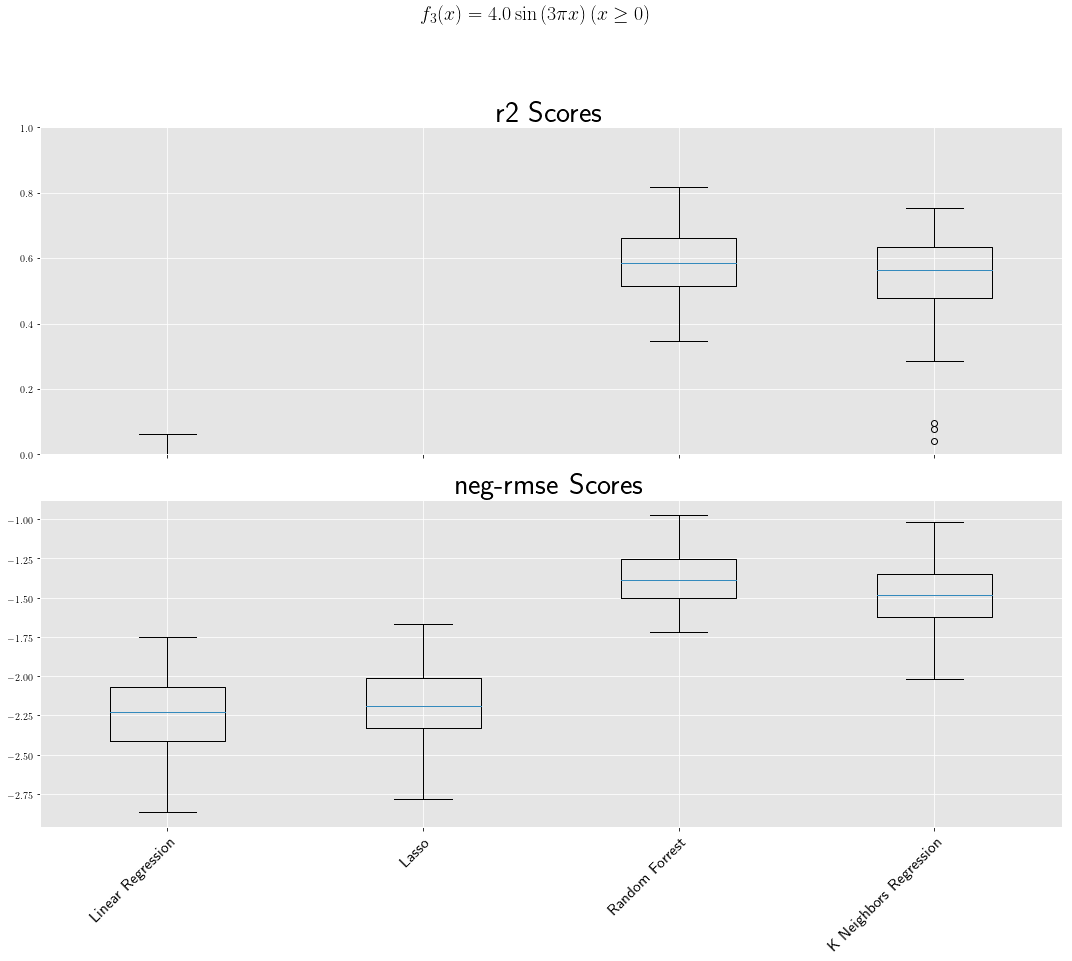

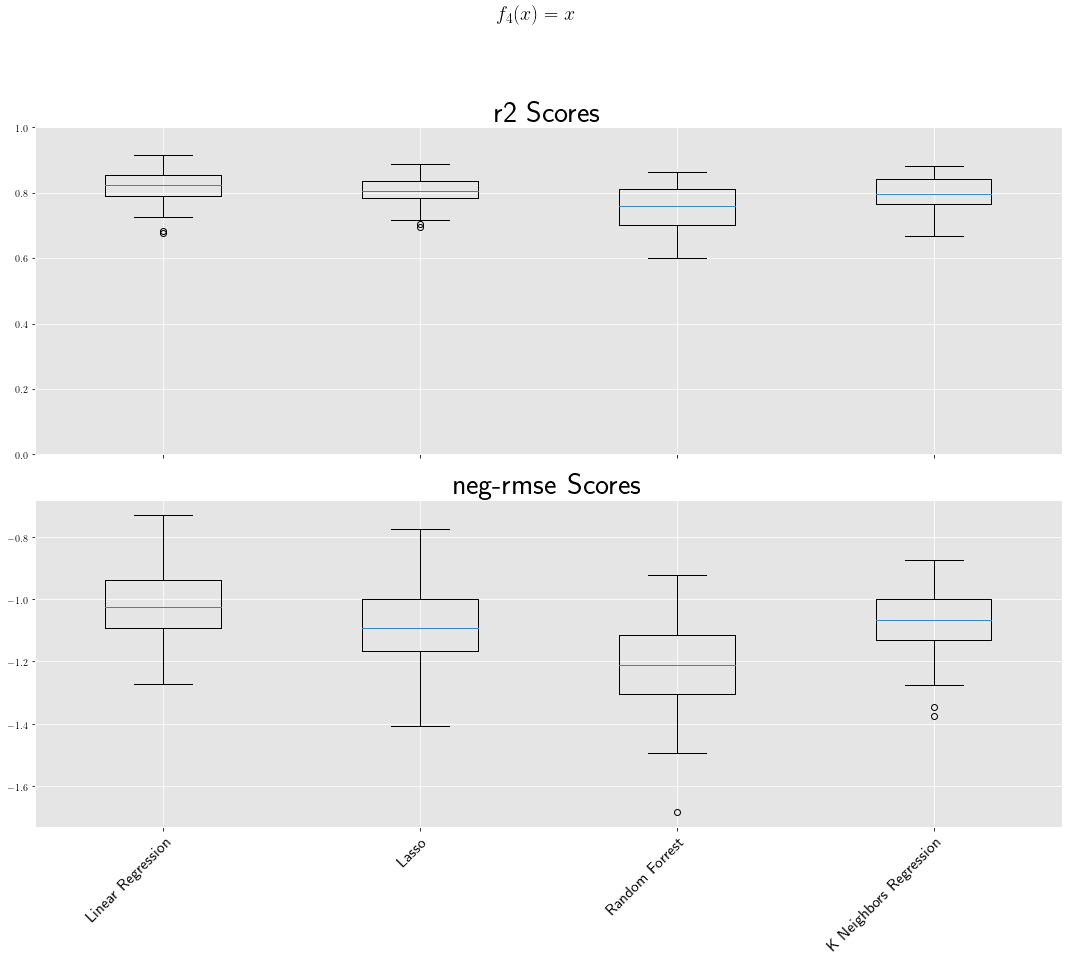

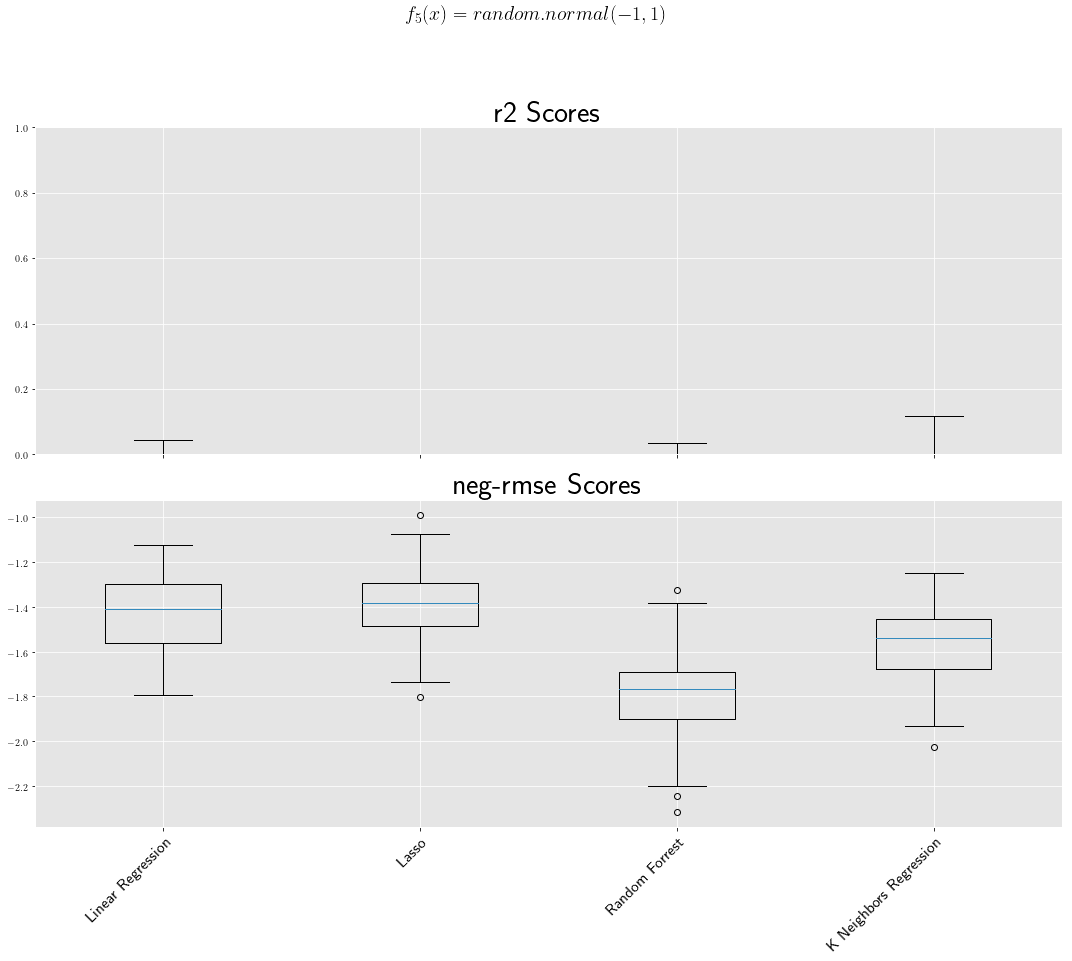

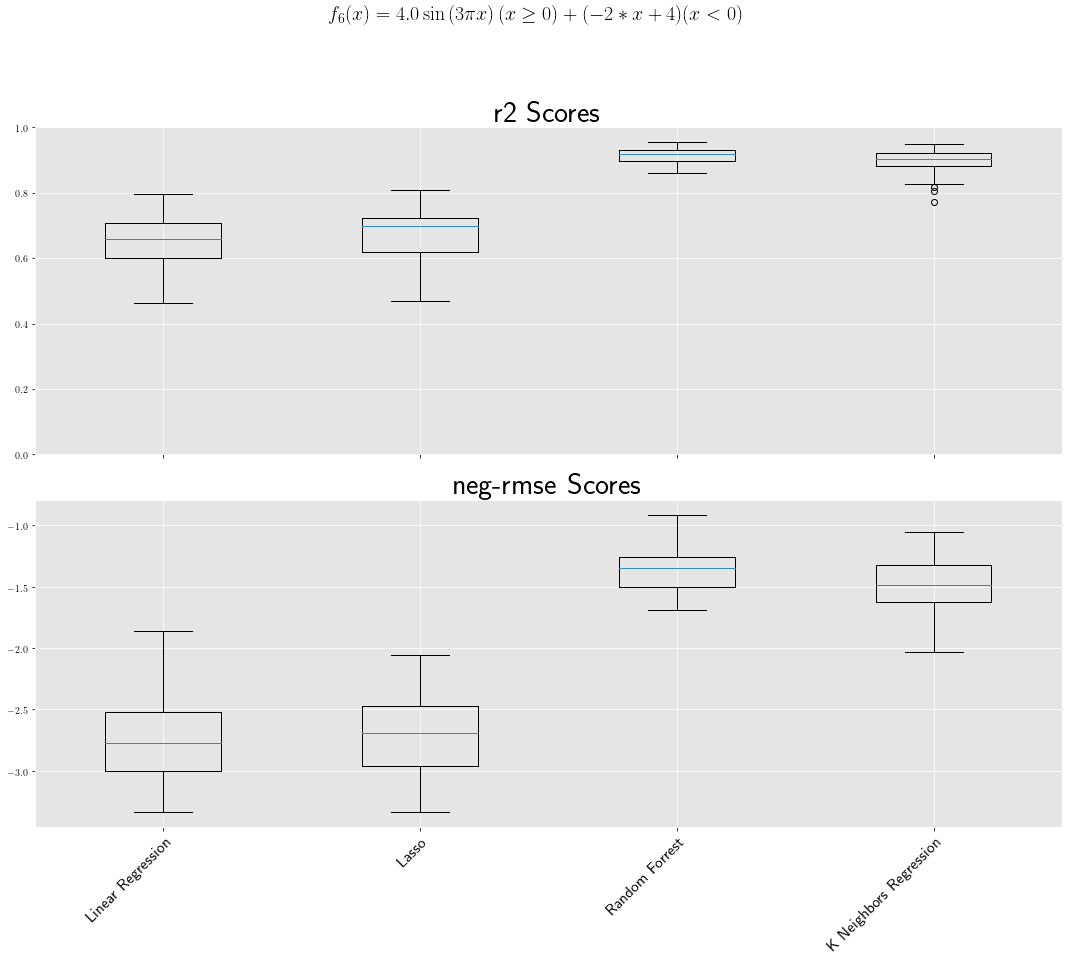

r2 [[ 0.38010998  0.16442902  0.0987395  -0.04333767  0.82178325 -0.04113892
   0.65115434]
 [ 0.36005425  0.14347912  0.01218249 -0.02803359  0.80397684 -0.02424674
   0.67745078]
 [ 0.69122758  0.68143796  0.67861875  0.58752777  0.75025947 -0.6920548
   0.91502937]
 [ 0.7212921   0.74966444  0.75499748  0.53383779  0.80138595 -0.23694178
   0.89922284]]


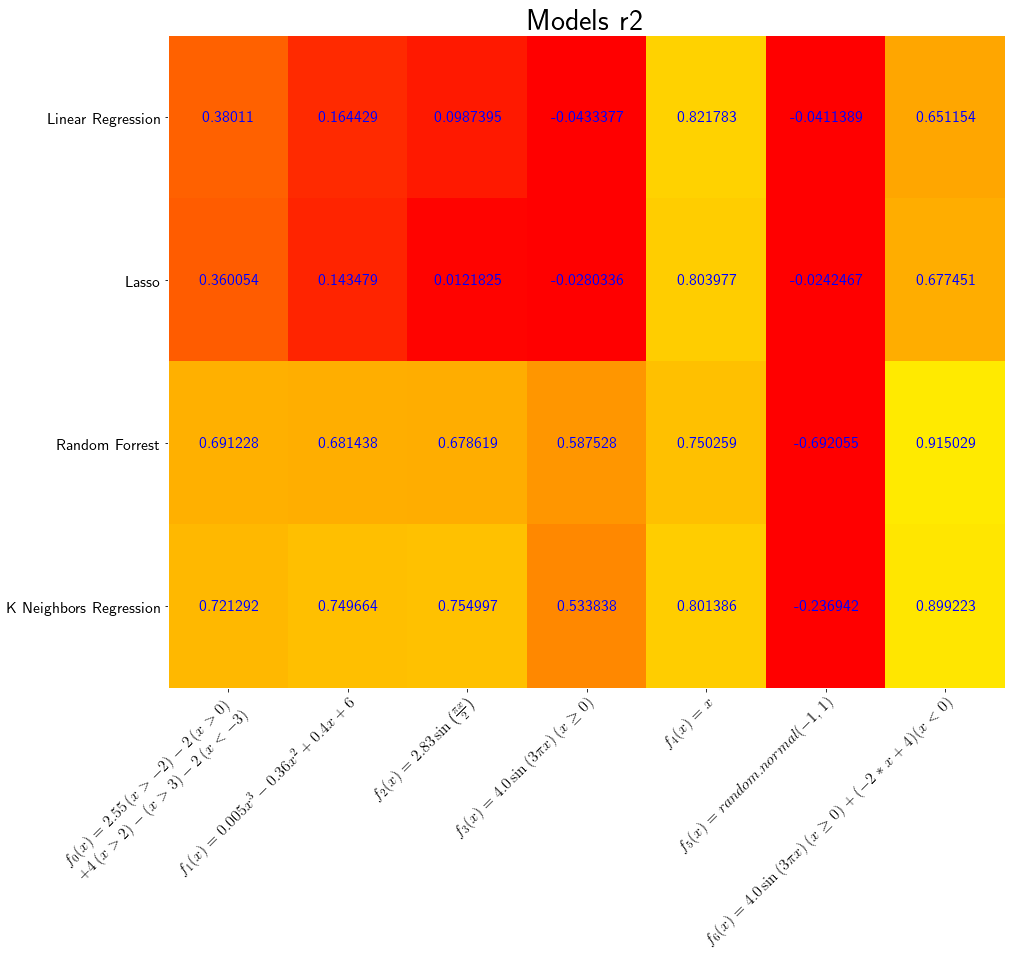

neg-rmse [[-1.67435537 -1.95924312 -2.08348716 -2.25154719 -1.00112486 -1.4182733
  -2.74176867]
 [-1.72970479 -2.05689475 -2.14789385 -2.1848519  -1.08546864 -1.38571293
  -2.69725985]
 [-1.20577531 -1.22120312 -1.23815656 -1.38029218 -1.21662814 -1.79293786
  -1.36605672]
 [-1.12956896 -1.07689248 -1.06577364 -1.48350242 -1.07594407 -1.56977651
  -1.49609474]]


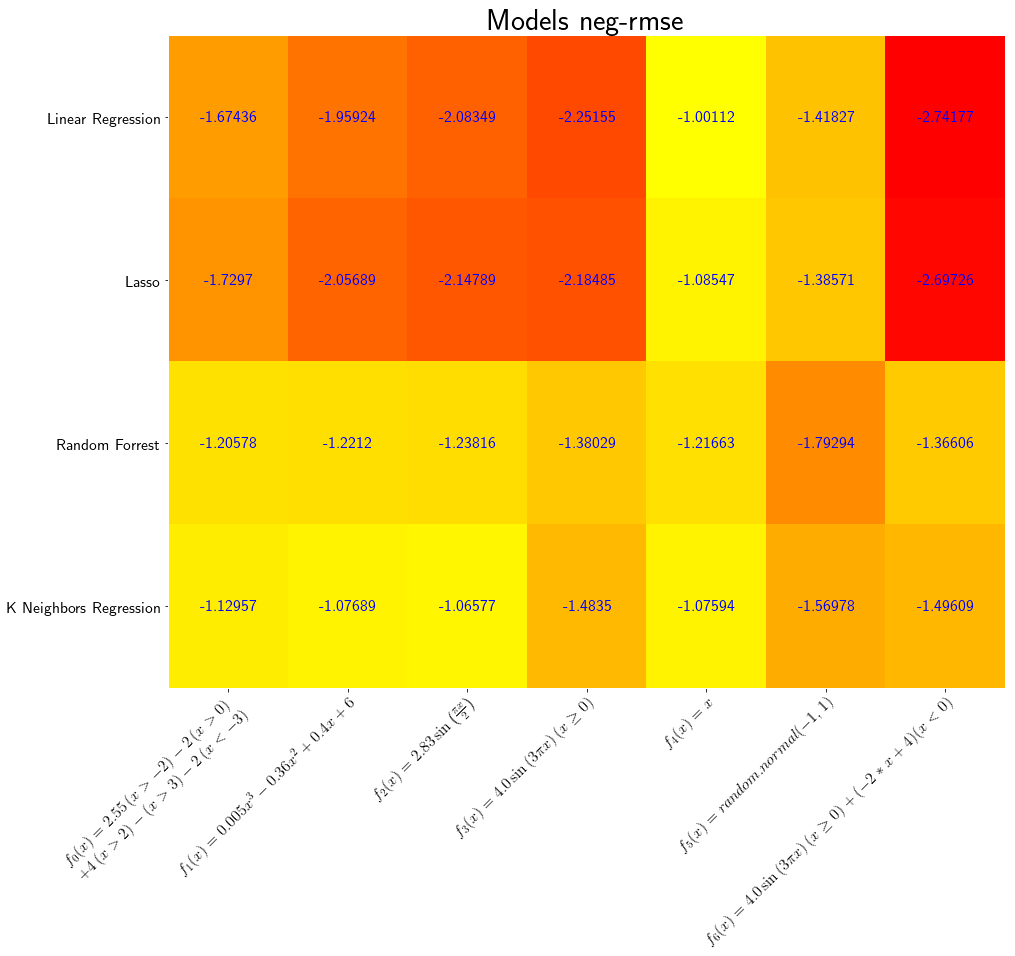

[[[ 0.48646552  0.40478159  0.50771405 ...  0.43218425  0.43492889
    0.10346822]
  [ 0.35943835  0.09973267  0.29709987 ...  0.32577438  0.25351175
   -0.17058709]
  [ 0.18575843  0.08782273  0.17326685 ...  0.05819326  0.19410931
    0.11658099]
  ...
  [ 0.8310925   0.85733835  0.88540895 ...  0.81941357  0.79430012
    0.6775804 ]
  [-0.06440577 -0.01460663 -0.00611697 ... -0.02744289 -0.00368312
   -0.01564646]
  [ 0.75287308  0.71346466  0.50190275 ...  0.55319888  0.63490074
    0.69147577]]

 [[ 0.4016797   0.22671157  0.32456213 ...  0.22130596  0.30254708
    0.26795227]
  [ 0.07442781  0.09942744  0.09140522 ...  0.0541679   0.07863418
    0.01248143]
  [-0.02643453 -0.01517582  0.02282344 ...  0.09602319  0.17441263
    0.1002125 ]
  ...
  [ 0.82555099  0.83507133  0.79972153 ...  0.83631539  0.77424919
    0.83717682]
  [-0.00220357 -0.01533322 -0.03129362 ... -0.05543378 -0.00708425
   -0.12031937]
  [ 0.71772855  0.62508477  0.69227367 ...  0.69049658  0.69950653
    0.

In [9]:
scores_range = [(0,1),(None,None)]# r2 is from 1 to 0 and neg-rmse is from 0 to neg-inf
res = compare_models(regressor_list=regressors,
               functions=function_list,
               scores=scores,
               score_ranges=scores_range,
               title="Models")
print(res["r2"])
np.savetxt("./output_files/linear_reg_lasso_randomF_kNeighbor_r2.csv", res["r2"][0].T,
           delimiter=",",fmt="%10.6f",
          header=",".join([repr(func)[1:6] for func in function_list]))